In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

In [2]:
import numpy as np
from sklearn.datasets import make_moons

def make_moons_random_assignment(n_samples, density=1, seed=0):
    np.random.seed(seed)
    X, l = make_moons(n_samples=(n_samples, n_samples*density), random_state=seed, noise=0.0)
    return X, l


np.random.seed(0)
random_seeds = np.random.choice(1_000_000, replace=False, size=10)
densities = list(range(1, 11, 1))
twoMoons_datasets = [
    [make_moons_random_assignment(100, density=density, seed=seed) for seed in random_seeds]
    for density in densities
]

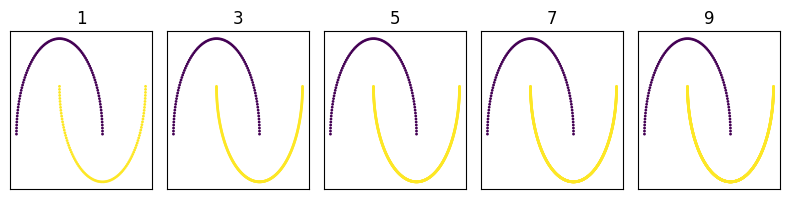

In [3]:
import matplotlib.pyplot as plt
from src.utils.plots import plot_datasets

plot_datasets(twoMoons_datasets[::2], densities[::2], rows=5, cols=5, figsize=1.6)
plt.savefig("imgs/TwoMoons_density_data.png")

In [5]:
from src.utils.experiments import cache, calc_eval_measures_for_multiple_datasets
from src.utils.metrics import create_and_filter_df


eval_results = cache(
    "TwoMoons_density",
    calc_eval_measures_for_multiple_datasets,
    [twoMoons_datasets, densities],
    recalc=False,
)

df = create_and_filter_df(eval_results)

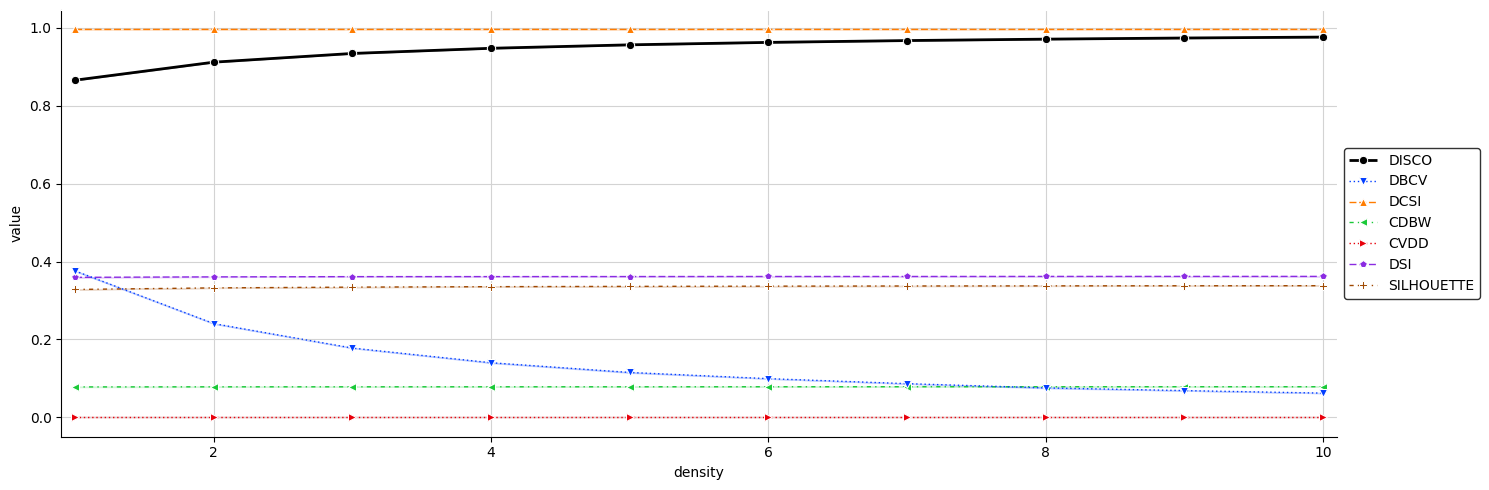

In [6]:
from src.utils.plots import plot_lineplot

eps = 0.1
x_range = densities[0] - eps, densities[-1] + eps
df = df.rename(columns={"dataset": "density"})

plot_lineplot(df, "density", "value", "measure", x_range=x_range, y_range=(None, None))
plt.savefig("imgs/TwoMoons_dims.png")